In [1]:
import sys
import os
import numpy as np
cwd = os.getcwd()
#Add the directory of the module to the path.
sys.path.append('/'.join(cwd.split('/')[0:-1]))
from virtualMACS import virtualMACS


# Initialize the object with a clear name and a cif file

In [2]:
testobj = virtualMACS('test_experiment',cifName='TiO2.cif')
testobj.sample.formula_weight=79.87
#File I/O operations require sudo access. Update to your password below.
testobj.sudo_password='password'

 Material.formula_weight=(val)
#########################
Old simulations found in /media/sf_OneDrive_-_Johns_Hopkins/MACS_McStas_interface/MACS_virtual_experiment/Demonstration/test_experiment/Kidney_simulations/
 
Successfully combined old simulations into /media/sf_OneDrive_-_Johns_Hopkins/MACS_McStas_interface/MACS_virtual_experiment/Demonstration/test_experiment/Kidney_simulations/test_experiment_total.csv

Data matrix instantiated and ready to use.
#########################


## Set the sample parameters

In this example, we use a box of the same dimensions as in the reference experiment. (4.3mm  x 3.3mm x 1.3 mm) (x,y,z)

In [3]:
testobj.sample.sample_shape='box'
testobj.sample.sample_widx=4.3e-3
testobj.sample.sample_widy=3.3e-3
testobj.sample.sample_widz=1.3e-3
testobj.sample.sample_tilt=-30
'''
testobj.sample.sample_shape='cylinder'
testobj.sample.sample_length=0.02
testobj.sample.sample_diameter_d=0.01
'''

"\ntestobj.sample.sample_shape='cylinder'\ntestobj.sample.sample_length=0.02\ntestobj.sample.sample_diameter_d=0.01\n"

## Assign Monochromator Parameters
In this example, we use Ei=5meV = Ef

In [4]:
testobj.monochromator.Ei = 5.0
testobj.monochromator.Ef = 5.0

## Assign Kidney Parameters

In [5]:
testobj.kidney.Ef=5.0
testobj.kidney.kidney_angle=-10.0

## Checking sample orientation and projection into lab frame is correct.

In [6]:
#First need to convert CIF to lau style file. 
testobj.sample.cif2lau()
Qmod_110 = testobj.sample.Qmag_HKL(1,1,0)
print('Momentum transfer of (110) = '+'{:.2f}'.format(Qmod_110)+' Ang^-1')

Conversion of CIF to crystallographical LAU file successful. 
Momentum transfer of (110) = 1.93 Ang^-1


In [7]:
#Tilt the sample
testobj.sample.crystal_axis_xrot=60.0
testobj.sample.crystal_axis_zrot=-15.0
testobj.sample.crystal_axis_zrot=0.0

print('Sample Lattice vectors')
print('')
print('a='+str(testobj.sample.a))
print('alpha='+str(testobj.sample.alpha))
print('b='+str(testobj.sample.b))
print('beta='+str(testobj.sample.beta))
print('c='+str(testobj.sample.c))
print('gamma='+str(testobj.sample.gamma))
print('')
print('Sample orientation U')
print(testobj.sample.orient_u)
testobj.sample.orient_u=[1,1,0]
testobj.sample.orient_v=[0,0,1]
print('Sample orientation v')
print(testobj.sample.orient_v)
print('')
testobj.sample.project_sample_realspace()
print('Real Space projection of lattice vectors [ax,ay,az; bx,by,bz;cx,cy,cz]')
print(testobj.sample.labframe_mat)
print('')
print('Structure factors:')
print('|F(110)|^2 = '+str(round(testobj.sample.fetch_F_HKL(1,1,0)[3],4))+' barn')
print('|F(100)|^2 = '+str(round(testobj.sample.fetch_F_HKL(1,0,0)[3],4))+' barn')
print('|F(1-10)|^2 = '+str(round(testobj.sample.fetch_F_HKL(1,-1,0)[3],4))+' barn')
print('|F(001)|^2 = '+str(round(testobj.sample.fetch_F_HKL(0,0,1)[3],4))+' barn')



Sample Lattice vectors

a=4.6001
alpha=90.0
b=4.6001
beta=90.0
c=2.9288
gamma=90.0

Sample orientation U
[1, 1, 0]
Sample orientation v
[0, 0, 1]

Real Space projection of lattice vectors [ax,ay,az; bx,by,bz;cx,cy,cz]
[[ 3.25276 -3.25276 -0.     ]
 [ 3.25276  3.25276 -0.     ]
 [ 0.       0.       2.9288 ]]

Structure factors:
|F(110)|^2 = 0.1782 barn
|F(100)|^2 = 0.0 barn
|F(1-10)|^2 = 0.1782 barn
|F(001)|^2 = 0.0 barn


## Check that some sample dependent cross sections are calculated correctly

In [8]:
print('sigma_abs ='+str(testobj.sample.rho_abs)+' barn/unit cell')
print('sigma_inc ='+str(testobj.sample.sigma_inc)+' barn/unit cell')

sigma_abs =12.18076 barn/unit cell
sigma_inc =2.8716 barn/unit cell


## If the instrument file has not been prepared and compiled, do so now.

In [9]:
useOld=True
if useOld==True:
    testobj.prepare_old_expt_directory()
    #testobj.clean_expt_directory()
else:
    testobj.prepare_expt_directory()
    testobj.edit_instr_file()
    testobj.compileInstr()
    testobj.compileMonochromator()

testobj.n_mono=1e7
testobj.n_sample=1e6

Generating sample parameters using file TiO2.cif
Writing instrument file assuming scattering u=[1, 1, 0], v=[0, 0, 1]
 
Instrument file /media/sf_OneDrive_-_Johns_Hopkins/MACS_McStas_interface/MACS_virtual_experiment/Demonstration/test_experiment/Instrument_files/MACS_sample_kidney_box.instr successfully prepared.

Ready to compile.

 
#################

Starting compilation of sample kidney geometry. This will take a few minutes.

Passing to bash to compile sample kidney geometry:

cc -O -o MACS_sample_kidney_box.out MACS_sample_kidney_box.c -lm
Compilation of sample kidney geometry successful.

#################

#################

Starting compilation of monochromator. This will take about around 10 minutes. 
Passing the following to bash to compile monochromator:
cc -O -o MACS_monochromator.out MACS_monochromator.c -lm
Compilation of monochromator geometry successful.

#################



## To clean the directory and prepare a new virtual experiment, try something like the following.

In [10]:
#The following parameters should produce a signal from the (110) on SPEC18
'''
testobj.monochromator.Ei=9.078
testobj.kidney.Ef=9.078
testobj.A3_angle = 67.37
testobj.kidney.kidney_angle=3.0
testobj.preserve_kidney_scan_files=False

testobj.runMonoScan()
testobj.runKidneyScan()

'''

'\ntestobj.monochromator.Ei=9.078\ntestobj.kidney.Ef=9.078\ntestobj.A3_angle = 67.37\ntestobj.kidney.kidney_angle=3.0\ntestobj.preserve_kidney_scan_files=False\n\ntestobj.runMonoScan()\ntestobj.runKidneyScan()\n\n'

## Scripting is simple. Simply specific a set of A3 angles and a list of incident energies and the package will handle the rest.

In [11]:
testobj.n_sample=1e6

testobj.kidney_angle_resolution=0.5
testobj.preserve_kidney_scan_files=False
testobj.script_scan(A3_list=np.arange(-70,-20,0.25),Ei_list=[5.0],\
                    num_threads=6,scan_title='_tio2_a3scan_cube')

testobj.data.load_data_matrix_from_csv('_tio2_a3scan_cube_dataMatrix.csv')
testobj.data.write_data_to_ng0('tio2_a3scan_cube.ng0')

Running these Ei values:[5.]
/media/sf_OneDrive_-_Johns_Hopkins/MACS_McStas_interface/MACS_virtual_experiment/kidney/macs_kidneylimit_new.txt


ValueError: No objects to concatenate

## It is also simple to emulate an experimental scan using the same values of A3, kidney angle, Ei, and Ef. Parameters are copied directly from ng0 file.

In [12]:
testobj.data.data_matrix=False 
#object looks for previous scans in the data matrix, set the data matrix to False to disable this behavior and run 
# all scans regardless of if they have been run before.
sample_ng0 = 'Example_ng0_files/fpx78891.ng0'
testobj.n_sample=1e6
testobj.simulate_ng0(sample_ng0,n_threads=6)

Emulating scan from fpx78891.ng0
Passing the following to mcstas:
mcrun -d Ei_5.0_beta1_1.01646_beta2_2.3076_n_10000000.0_sample_diam_0.02 -n 10000000.0 MACS_monochromator.instr EM=5.0 dEM=0.1 EF_all=4.99757 HF=1 VF=1 sample_diameter_d=0.02 beta_1=1.01646 beta_2=2.3076 misalign_mono_deg=0.15 CPF=0 MPL=6.06 MPD=0.775 APE_h=0.35 APE_v=0.35 misalign_mono_deg=0.15 kidney_angle=-10.0 DIRDEV=0 DIVSOU=3.0 L0_delta=-1.06 L1_delta=0.0 mon_t=0.0 mon_e=0.0 monrot_delta=0 write_virtual_out=1


1

## We can also do this for a directory of ng0 files, this will take a while. 

In [13]:
ngo_dir = 'Example_ng0_files/'
#testobj.simulate_ng0dir(ngo_dir,n_threads=6) #Uncomment this line to run the example directory.

## At any point the files in the kidney scan folder can be converted into MSlice readable ng0 files. The files may be divided into individual Ei values or combined into a single larger one. If they originate from ng0 files, they may also be individual ng0 files corresponding to their origin files

In [14]:
#Here we combine any scans that exist individually and append them to the data holder class
testobj.data.combine_csv_scans(preserve_old=True,flagstr='_combined_')
testobj.data.load_data_matrix_from_csv(csv_name='_combined_dataMatrix.csv')

ValueError: No objects to concatenate

In [ ]:
#The data is now written to a MACS style file for comparison in MSlice.
testobj.data.write_data_to_ng0(filename='_cube_TiO2_demonstration_scan.ng0',beta_1=testobj.monochromator.beta_1,\
                               beta_2=testobj.monochromator.beta_2)

In [ ]:
testobj.data.combine_all_csv()
testobj.data.load_data_matrix_from_csv('_total.csv')

In [ ]:
testobj.data.write_data_to_ng0(filename='_a3scan.ng0')

## Limited MSlice-like tools are also available. To use these, first project the measurement into Q-space. Real data may also be loaded to compare to.

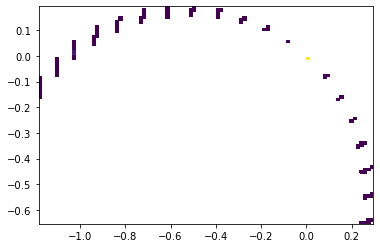

In [24]:
import matplotlib.pyplot as plt
testobj.data.project_data_QE()
U,V,I = testobj.data.bin_constE_slice(100,90,[-2,2],[-2,2],[-1,1])

plt.figure()
plt.pcolormesh(-U,V,I.T)